# Image Segmentation Using Clustering

- For image handling we use opencv library
- pip install opencv-python

#### Read the image

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('D:\ML training\python\image.png')

#### to display the image

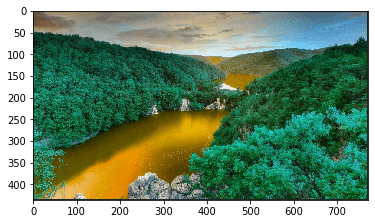

In [2]:
plt.imshow(image)
plt.show()

#### convert image into RGB

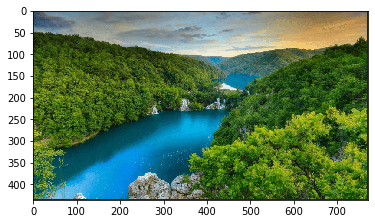

In [4]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.show()

- image segmentation mean partition of image into multiple segments

- here we require minimum 3 segments

- and sengmentation is basically done using pixel values

#### Reshape the image to a 2D array of pixel and 3 color values(RGB)

In [5]:
pixel_values = image.reshape((-1,3))

# convert to float
pixel_value = np.float32(pixel_values)
print(pixel_value.shape)

(336592, 3)


#### Defining stoping criteria of kmeans algo

- when two consecutive centroids get the same value then we stop

In [6]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER , 100, 0.2)

#### Number of clusters (k)

In [7]:
k = 3
_ , labels, (centers) = cv2.kmeans(pixel_value, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [8]:
centers

array([[ 13.035985, 134.39548 , 185.26256 ],
       [153.30374 , 160.25224 , 128.49608 ],
       [ 52.335625,  87.116234,  30.718573]], dtype=float32)

#### convert back to 8 bit values

In [14]:
centers = np.uint8(centers)

# flatten the labels array
labels = labels.flatten()

####  Convert all pixel to the color of the centroids

In [15]:
segmented_image = centers[labels.flatten()]

#### Reshape back to the original image dimensions

In [16]:
segmented_image = segmented_image.reshape(image.shape)

#### Show the image

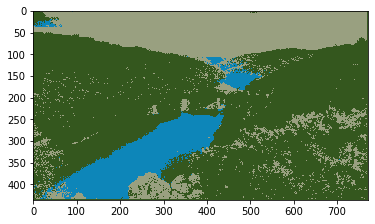

In [17]:
plt.imshow(segmented_image)
plt.show()

 here we have 3 colors in the image